<h2>Notebook odpowiedzialny za prezentacje wyników pomiarów optymalności</h2>

<h3>1. Import bibliotek</h3>

In [50]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
from builders.PathBuilder import PathBuilder
from constants.MeasurementBasic import *
from constants.MeasurementTimeWithOutputData import *
from constants.AlgNamesResults.names import *

class NamesOfColumns:
    used_algorithm = USED_ALGORITHM
    name_of_src_file = NAME_OF_SRC_FILE
    number_of_cities = NUMBER_OF_CITIES
    index_of_sample = NUMBER_OF_SAMPLE
    best_way = BEST_WAY
    full_cost = FULL_COST
    hamiltonian_cycle_cost = HAMILTONIAN_CYCLE_COST
    time_duration_without_malloc_in_sec = TIME_DURATION_WITHOUT_MALLOC_IN_SEC
    utilization_of_cpu = "utilization_of_cpu"
    used_memory_after_measurement_in_bytes = "used_memory_after_measurement_in_bytes"
    used_memory_peak_after_measurement_in_bytes = "used_memory_peak_after_measurement_in_bytes"
    is_valid_way = "is_valid_way"
    is_optimal_cost = "is_optimal_cost"
    is_optimal_way = "is_optimal_way"
    is_best_and_optimal = "is_best_and_optimal"
    distance_error = "distance_error"
    optimal_error_percentage = "optimal_error_percentage"
    average_cpu_utilization = "average_cpu_utilization"

<h3>2. Wczytanie pliku z danymi pomiarowymi z metrykami i ich prezentacja</h3>

In [51]:
path_to_csv = PathBuilder()\
.add_dir("results_tsp")\
.add_file_with_extension("tsp_results_with_added_metrics.csv")\
.build()
print(path_to_csv)
df = pd.read_csv(path_to_csv)
df

D:\STUDIA\Studia_magisterskie\SEM_3\praca_magisterska\TSP_magistery_pl_job/results_tsp/tsp_results_with_added_metrics.csv


,Unnamed: 0,Unnamed: 0.1,used_algorithm,name_of_src_file,number_of_cities,index_of_sample,best_way,full_cost,hamiltonian_cycle_cost,time_duration_without_malloc_in_sec,utilization_of_cpu,used_memory_after_measurement_in_bytes,used_memory_peak_after_measurement_in_bytes,is_valid_way,is_optimal_cost,is_optimal_way,is_best_and_optimal,distance_error,optimal_error_percentage,average_cpu_utilization
0,0,0,astar_heuristic_self_impl,TSP_CITIES_SET_0_N_4.json,4,0,"[0, 3, 2, 1, 0]",1935.208176,1935.208176,0.000492,[23.7],11816,11816,True,False,True,True,0.000000,0.000000,23.700000
1,1,1,astar_heuristic_self_impl,TSP_CITIES_SET_1_N_4.json,4,1,"[0, 2, 1, 3, 0]",3261.754206,3261.754206,0.000235,[41.7],11816,11816,True,False,False,False,411.790002,14.448953,41.700000
2,2,2,astar_heuristic_self_impl,TSP_CITIES_SET_2_N_4.json,4,2,"[0, 1, 2, 3, 0]",2684.775933,2684.775933,0.000244,[20.3],12104,12104,True,False,False,False,11.992011,0.448671,20.300000
3,3,3,astar_heuristic_self_impl,TSP_CITIES_SET_3_N_4.json,4,3,"[0, 3, 2, 1, 0]",2088.938558,2088.938558,0.000780,[3.6],12104,12104,True,True,True,True,0.000000,0.000000,3.600000
4,4,4,astar_heuristic_self_impl,TSP_CITIES_SET_4_N_4.json,4,4,"[0, 1, 2, 3, 0]",2138.469421,2138.469421,0.000236,[66.0],10040,10040,True,True,True,True,0.000000,0.000000,66.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10425,10425,10425,ant_colony_tsp_scikit_opt,TSP_CITIES_SET_95_N_15.json,15,95,"[0, 10, 4, 11, 1, 9, 13, 8, 2, 3, 7, 12, 6, 5,...",5439.078830,6321.771302,8.529102,"[12.3, 25.0, 14.3, 19.0, 13.9, 12.7, 16.1, 14....",64731,64731,True,False,False,False,200.835871,3.281130,14.990476
10426,10426,10426,ant_colony_tsp_scikit_opt,TSP_CITIES_SET_96_N_15.json,15,96,"[0, 4, 5, 3, 12, 7, 14, 11, 6, 1, 10, 8, 2, 9,...",5095.603599,6160.569326,8.661427,"[11.7, 16.7, 11.7, 12.5, 12.5, 18.8, 23.4, 14....",64731,64731,True,False,False,False,439.877002,7.689227,13.959459
10427,10427,10427,ant_colony_tsp_scikit_opt,TSP_CITIES_SET_97_N_15.json,15,97,"[0, 11, 2, 7, 3, 12, 9, 6, 4, 14, 8, 10, 5, 1,...",6095.282460,7359.134508,8.276631,"[12.3, 17.2, 19.0, 12.5, 17.2, 14.3, 12.3, 12....",64731,64731,True,False,False,False,392.800915,5.638560,16.825000
10428,10428,10428,ant_colony_tsp_scikit_opt,TSP_CITIES_SET_98_N_15.json,15,98,"[0, 13, 9, 7, 4, 6, 12, 14, 2, 3, 8, 1, 5, 11,...",5125.827881,6072.980455,8.188490,"[17.2, 11.5, 20.8, 17.2, 12.5, 14.3, 17.9, 12....",64731,64731,True,False,False,False,371.459376,6.515093,18.722222


<h3>3. Wyodrębnienie danych dotyczących optymalności uzyskanych rozwiązań</h3>

In [52]:
AVG_TIME_DURATION = "avg_time_duration"
AVG_CPU_UTILIZATION = "average_cpu_utilization"
AVG_DISTANCE_ERROR = "avg_distance_error"
AVG_OPTIMAL_ERROR_PERCENTAGE = "avg_optimal_error_percentage"
AVG_METRIC_NAMES = [AVG_TIME_DURATION, AVG_CPU_UTILIZATION, AVG_DISTANCE_ERROR, AVG_OPTIMAL_ERROR_PERCENTAGE]
used_algorithms_list = df[USED_ALGORITHM].to_list()
src_file_names_list = list(set(df[NAME_OF_SRC_FILE].to_list()))

START_NUMBER_CITIES = 4
STOP_NUMBER_CITIES = 15
NUMBER_OF_CITIES = [item for item in range(START_NUMBER_CITIES, STOP_NUMBER_CITIES + 1)]
subset_data = df[[
        NamesOfColumns.used_algorithm,
        NamesOfColumns.number_of_cities,
        NamesOfColumns.distance_error,
        NamesOfColumns.optimal_error_percentage,
        NamesOfColumns.time_duration_without_malloc_in_sec,
        NamesOfColumns.average_cpu_utilization,
        NamesOfColumns.used_memory_after_measurement_in_bytes,
        NamesOfColumns.used_memory_peak_after_measurement_in_bytes
]]
subset_data

,used_algorithm,number_of_cities,distance_error,optimal_error_percentage,time_duration_without_malloc_in_sec,average_cpu_utilization,used_memory_after_measurement_in_bytes,used_memory_peak_after_measurement_in_bytes
0,astar_heuristic_self_impl,4,0.000000,0.000000,0.000492,23.700000,11816,11816
1,astar_heuristic_self_impl,4,411.790002,14.448953,0.000235,41.700000,11816,11816
2,astar_heuristic_self_impl,4,11.992011,0.448671,0.000244,20.300000,12104,12104
3,astar_heuristic_self_impl,4,0.000000,0.000000,0.000780,3.600000,12104,12104
4,astar_heuristic_self_impl,4,0.000000,0.000000,0.000236,66.000000,10040,10040
...,...,...,...,...,...,...,...,...
10425,ant_colony_tsp_scikit_opt,15,200.835871,3.281130,8.529102,14.990476,64731,64731
10426,ant_colony_tsp_scikit_opt,15,439.877002,7.689227,8.661427,13.959459,64731,64731
10427,ant_colony_tsp_scikit_opt,15,392.800915,5.638560,8.276631,16.825000,64731,64731
10428,ant_colony_tsp_scikit_opt,15,371.459376,6.515093,8.188490,18.722222,64731,64731


In [53]:
print(used_algorithms_list)

['astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuristic_self_impl', 'astar_heuris

In [54]:
dictionary_subset_by_alg_name = dict()
for alg_name in used_algorithms_list:
    dictionary_subset_by_alg_name[alg_name] = subset_data[(subset_data[NamesOfColumns.used_algorithm] == alg_name)]
print("DONE")

DONE


In [55]:
X=NamesOfColumns.number_of_cities
Y=NamesOfColumns.optimal_error_percentage
for alg_name in used_algorithms_list:
    data = dictionary_subset_by_alg_name[alg_name]
    data = data.reset_index()
    data = data[[X, Y]]
    data = data.groupby([X]).mean()
    dictionary_subset_by_alg_name[alg_name] = data

print("DONE")

DONE


In [74]:
alg = PARTICLE_SWARM_OPT_TSP_DIR
dft = dictionary_subset_by_alg_name[alg]
print(dft.values.flatten())
print(dft.index.tolist())

[0.         0.         0.         0.02560018 0.12284558 0.4881995
 1.23136315 2.75892669 3.68577922 5.98849871 6.0017686  8.91696861]
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [99]:
import matplotlib
from statistics import mean
import numpy as np
alg_y = dict()
alg_name_color = list()
colors = iter(matplotlib.cm.rainbow(np.linspace(0, 1, len(used_algorithms_list))))
plt.figure()
DATA_TO_DIAGRAM = dict()
# DATA_TO_DIAGRAM[X] = dft.index.tolist()
general_x = dft.index.tolist()
for alg_name in used_algorithms_list:
    data = dictionary_subset_by_alg_name[alg_name]
    y = data.values.flatten()
    x = data.index.tolist()
    # if len(y) < len(general_x):
    #     y_tmp =  [mean(y)]* len(general_x)
    #     for index in range(0, len(x)-1):
    #         y_tmp[index] = y[index]
    #     y = y_tmp
    DATA_TO_DIAGRAM[alg_name] = y
for key in DATA_TO_DIAGRAM.keys():
    values = DATA_TO_DIAGRAM[key]
    print("column_name: %s | number_of_rows: %s" %(key, len(values)))

print("DONE")

column_name: astar_heuristic_self_impl | number_of_rows: 10
column_name: greedy_search_heuristic_self_impl | number_of_rows: 12
column_name: local_search_heuristic_lib_python_tsp | number_of_rows: 12
column_name: simulated_annealing_heuristic_lib_python_tsp | number_of_rows: 12
column_name: brute_force_lib_python_tsp | number_of_rows: 9
column_name: dynamic_programing_exact_held_karp_lib_python_tsp | number_of_rows: 12
column_name: genetic_algorithm_heuristic_lib_mlrose | number_of_rows: 12
column_name: genetic_algorithm_heuristic_scikit_opt | number_of_rows: 12
column_name: particle_swarm_tsp | number_of_rows: 12
column_name: ant_colony_tsp_scikit_opt | number_of_rows: 12
DONE


<Figure size 432x288 with 0 Axes>

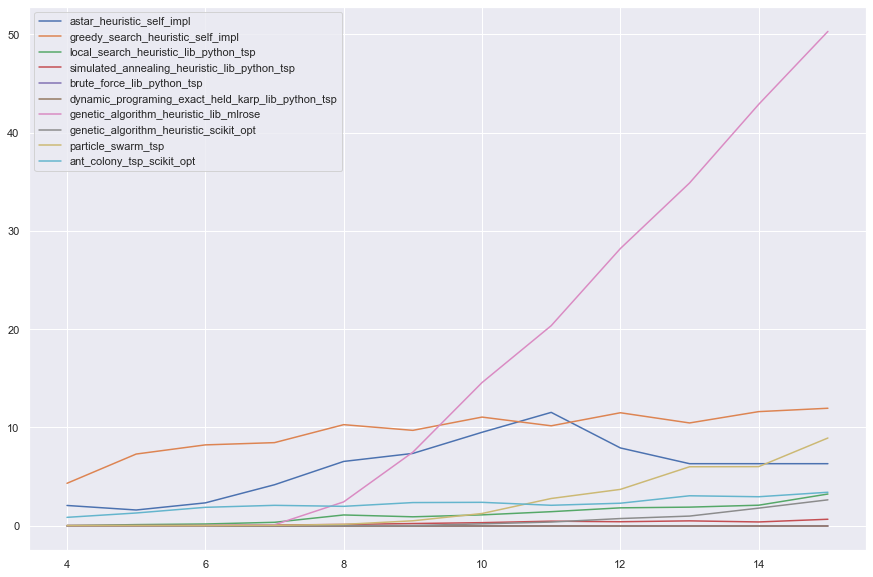

In [98]:
df_to_diagram = pd.DataFrame(data = DATA_TO_DIAGRAM)
df_to_diagram.index = general_x
df_to_diagram.plot(figsize=(15, 10))